In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
from sklearn.datasets import fetch_california_housing

In [40]:
dataset = fetch_california_housing()

In [41]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [42]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = dataset.target

In [43]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
df = df.sample(frac=0.25)

In [45]:
X = df.iloc[:,:-1]
y = df.target

In [46]:
X.shape

(5160, 8)

In [47]:
df.shape

(5160, 9)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [49]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [50]:
y_pred = regressor.predict(X_test)

In [51]:
y_pred

array([1.019, 0.988, 0.875, ..., 1.952, 1.775, 2.26 ])

In [52]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.4772578712078325


In [53]:
# Hyperparameter Tuning
parameter = {
 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [54]:
regressor = DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV


In [55]:
clf = GridSearchCV(regressor, param_grid=parameter,cv=5,scoring = 'neg_mean_absolute_error')

In [56]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [57]:
clf.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [58]:
y_pred = clf.predict(X_test)

In [60]:
print(r2_score(y_pred,y_test))

0.39881987698880594


In [65]:
reg = DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [68]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [69]:
y_predd = reg.predict(X_test)

In [70]:
r2_score(y_test,y_predd)

0.5834374391772044

In [71]:
from sklearn import tree

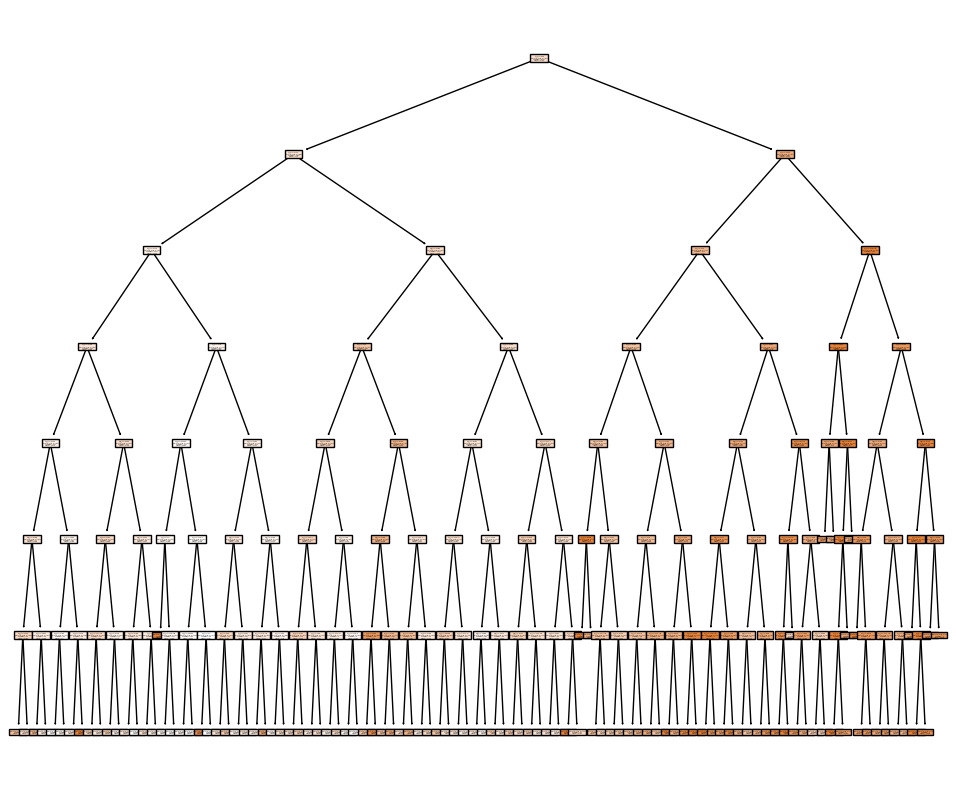

In [73]:

plt.figure(figsize=(12,10))
tree.plot_tree(reg,max_depth=7,filled=True)
plt.show()